In [177]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [178]:
##### load Odin extractions #####

combined_ie = pd.read_csv("combined_data_ie_label.csv")
ie_extraction = combined_ie[['message_id', 'ie_extraction']]

# keep nan values for ie_extraction to have the original sequence of utterances
# annotations may have CLC labels on utt that does not have ie extraction
ie_extraction

,message_id,ie_extraction
0,70cfac19-1171-44a8-b1c1-6d3069941118,NaN
1,10a34235-9c1c-4a46-a2b6-1b553f58271d,NaN
2,cec24808-49b9-43d1-a703-ac6fd5c7c202,NaN
3,aa13fe0f-b4a8-4b22-a0eb-4ba9abebacbf,NaN
4,c1f6b2ce-4476-4e6c-b913-a26fdd89ada1,NaN
...,...,...
6722,d2b9850c-79a0-41ca-a91c-fc765ce7cb6b,KnowledgeSharing
6723,912ee2c8-0dbc-45cf-8e06-4f1c512dc4ca,"DeliberatePlan, TimeUnit"
6724,25d58291-6c08-46aa-9d1c-b39175370745,NaN
6725,4602f1ba-7c39-4587-af49-a616eff03e1e,NaN


In [31]:
len(ie_extraction)

6727

In [184]:
##### load annotation #####

def readFile(dir):
    dataAll_df = pd.read_csv(dir,index_col=None, header=0).\
        fillna("NA")\
        [["message_id", "Label", "Score", "Category", "Note"]]
    # exclude pre-game and post-game lines
    # exclude no annnotation lines
    data = dataAll_df[dataAll_df["Note"] == "NA"]\
                [dataAll_df["Label"] != "NA"]\
                [["message_id", "Label", "Score", "Category"]]
    return data

In [185]:
dir_csv = glob.glob(os.path.join("/Users/yuwei/Desktop/RA/CLC-new-ann-model/new_ann", 
                                "*.csv"))
dir_csv.sort()

dfs = (readFile(dir) for dir in dir_csv)
ann_df = pd.concat(dfs, ignore_index=True)
ann_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,message_id,Label,Score,Category
0,34f36874-be3a-4187-bd66-1fa69d4e0c28,1a,NA,assert
1,50de2843-270f-47d8-9e23-b41fb82ac3e5,1b,1,acknowledge
2,342f31d6-388d-4e33-a257-4d4314b20cdb,2b,1,accept
3,b1952888-cc6f-4f4b-9843-fde04c1708a0,2a,NA,action-directive
4,8047c7fa-89d2-447b-bcb8-d1c2e6c98c5b,3a,NA,action-directive
...,...,...,...,...
5337,9fda7355-30c7-4363-9666-4f0347070a60,66c.67a,NA,acknowledge.assert
5338,0f240579-dcb2-49aa-8758-138e8a8a392d,67b.68a,3,info-provide.assert
5339,8521d8bc-fc19-4ff3-bc77-0e1133f993fe,68a+,NA,assert
5340,37dfcb89-3e16-41a3-ac94-b90e870b21fd,68a++,NA,assert


In [186]:
##### map ie extractions to annotation df #####
ie_dict = dict(zip(ie_extraction.message_id, ie_extraction.ie_extraction))
ann_df["ie_extraction"] = ie_extraction["message_id"].map(ie_dict)
ann_df

,message_id,Label,Score,Category,ie_extraction
0,34f36874-be3a-4187-bd66-1fa69d4e0c28,1a,NA,assert,NaN
1,50de2843-270f-47d8-9e23-b41fb82ac3e5,1b,1,acknowledge,NaN
2,342f31d6-388d-4e33-a257-4d4314b20cdb,2b,1,accept,NaN
3,b1952888-cc6f-4f4b-9843-fde04c1708a0,2a,NA,action-directive,NaN
4,8047c7fa-89d2-447b-bcb8-d1c2e6c98c5b,3a,NA,action-directive,NaN
...,...,...,...,...,...
5337,9fda7355-30c7-4363-9666-4f0347070a60,66c.67a,NA,acknowledge.assert,NaN
5338,0f240579-dcb2-49aa-8758-138e8a8a392d,67b.68a,3,info-provide.assert,NaN
5339,8521d8bc-fc19-4ff3-bc77-0e1133f993fe,68a+,NA,assert,NaN
5340,37dfcb89-3e16-41a3-ac94-b90e870b21fd,68a++,NA,assert,ReportLocation


In [187]:
# check manually if all trials has ie labels attached on them
# yes.
ann_df.to_csv("ann_extend_ie.csv", index=False)

In [188]:
###### Find Call-out label set #####

# filtering the rows where Label contains 'a'
callout_df = ann_df[ann_df['Label'].str.contains('a')]

# filtering the callout_df where Category is 'assert'
callout_assert = callout_df[callout_df['Category'].str.contains('assert')]
# filtering the callout_df where Category is 'commit'
callout_commit = callout_df[callout_df['Category'].str.contains('commit')]
# filtering the callout_df where Category is 'action-directive'
callout_action = callout_df[callout_df['Category'].str.contains('action-directive')]
# filtering the callout_df where Category is 'info-request'
callout_info = callout_df[callout_df['Category'].str.contains('info-request')]

In [189]:
###### Find Check-back label set #####

# filtering the rows where Label contains 'b'
checkback_df = ann_df[ann_df['Label'].str.contains('b')]

# filtering the checkback_df where Category is 'acknowledge'
checkback_acknowledge = checkback_df[checkback_df['Category'].str.contains('acknowledge')]
# filtering the checkback_df where Category is 'accept'
checkback_accept = checkback_df[checkback_df['Category'].str.contains('accept')]
# filtering the checkback_df where Category is 'follow-up-question'
checkback_question = checkback_df[checkback_df['Category'].str.contains('follow-up-question')]
# filtering the checkback_df where Category is 'info-request'
checkback_info = checkback_df[checkback_df['Category'].str.contains('info-provide')]

In [190]:
###### Find Closing-of-the-loop label set #####

# filtering the rows where Label contains 'c'
closing_df = ann_df[ann_df['Label'].str.contains('c')]

# filtering the checkback_df where Category is 'acknowledge'
closing_acknowledge = closing_df[closing_df['Category'].str.contains('acknowledge')]
# filtering the checkback_df where Category is 'accept'
closing_accept = closing_df[closing_df['Category'].str.contains('accept')]
# filtering the checkback_df where Category is 'info-request'
closing_info = closing_df[closing_df['Category'].str.contains('info-provide')]

In [191]:
##### get label frequency for each phase and category #####

def find_label_freq(label_cat_df):
    '''takes in df of each label/label_category, e.g.callout_df/callout_assert
    and returns a list of the freq for each Odin label for that clc lable/label_category.
    e.g. [(647, 'Agreement'), (197, 'KnowledgeSharing')]'''
    label_cat_list = label_cat_df['ie_extraction'].dropna().to_list()
    label_cat_freq = {}
    for labels in label_cat_list:
        labels = labels.split(', ')
        for label in labels:
            if label not in label_cat_freq:
                label_cat_freq[label] = 1
            else:
                label_cat_freq[label] += 1
    label_cat_freq_list = sorted([(value, key) for (key, value) in label_cat_freq.items()],
                           reverse=True)
    return label_cat_freq_list

In [192]:
def all_part_bool(df_all, part_id_list):
    '''for each id in df_all, if the id in part, give a 1, else 0
    This function is used to prepare the tokenized golden and detection for acc'''
    res = []
    for id in df_all["message_id"]:
        if id in part_id_list:
            res.append(1)
        else:
            res.append(0)
    return res

def find_labelset_scores(labelset, label_cat_df):
    '''takes in a label set that selected from the Odin label freq list, and the 
    label/label category df. 
    Golden ann is a list of bool values for the all utts on whether an utt is marked with a certain label/label_cat.
    Detected is a list of bool values for all utts on whether an utt contains the Odin label that in the selected Odin label list for that clc label/label_cat.
    Returns acc, precision, recall, and f1 scores for that clc label cat'''
    ann = all_part_bool(ann_df, label_cat_df["message_id"].to_list())
    utt_label_dict = dict(zip(ann_df.message_id, ann_df.ie_extraction))
    detected_id = []
    for id, labels in utt_label_dict.items():
        found = False
        if labels == labels: ## filter out nan
            labels = labels.split(', ')
            for label in labels:
                if label in labelset:
                    found = True
        if found:
            detected_id.append(id)
    detected = all_part_bool(ann_df, detected_id)
    acc, precision, recall, f1 = round(accuracy_score(ann, detected), 3),\
                        round(precision_score(ann, detected, zero_division=1), 3),\
                        round(recall_score(ann, detected, zero_division=1), 3),\
                        round(f1_score(ann, detected, zero_division=1), 3)
    return acc, precision, recall, f1

    

In [193]:
def print_labelset_scores(labelset, label_cat_df):
    acc, precision, recall, f1 = find_labelset_scores(labelset, label_cat_df)
    print("acc: ", acc)
    print("precision: ", precision)
    print("recall: ", recall)
    print("f1: ", f1)

In [194]:
def plot_scores(labelset, label_cat_df):
    '''Taking n of labels as the x_values, 
    the acc, precision, recall and f1 scores as y_values,
    and line plot them'''
    x_values = range(len(labelset))
    y_acc, y_precision, y_recall, y_f1 = [], [], [], []
    for i in x_values:
        acc, precision, recall, f1 = find_labelset_scores(labelset[:i], label_cat_df)
        y_acc.append(acc)
        y_precision.append(precision)
        y_recall.append(recall)
        y_f1.append(f1)
    scores_df = pd.DataFrame({'x_values':x_values,
                              'accuracy':y_acc,
                              'precision':y_precision,
                              'recall':y_recall,
                              'f1':y_f1})
    plt.plot( 'x_values', 'accuracy', data=scores_df, marker='', color='#D95319', linewidth=2)
    plt.plot( 'x_values', 'precision', data=scores_df, marker='', color='#0072BD', linewidth=2)
    plt.plot( 'x_values', 'recall', data=scores_df, marker='', color='#7E2F8E', linewidth=2)
    plt.plot( 'x_values', 'f1', data=scores_df, marker='', color='#77AC30', linewidth=2)
    # show legend
    plt.legend()
    # show graph
    plt.show()


In [206]:
##### Call-out: assert #####
assert_labels = find_label_freq(callout_assert)
#assert_labels = [i[1] for i in assert_labels]
assert_labels

[(647, 'Agreement'),
 (197, 'KnowledgeSharing'),
 (142, 'DeliberatePlan'),
 (126, 'Precedence'),
 (117, 'YesNoQuestion'),
 (90, 'MakeCommitment'),
 (81, 'Meeting'),
 (80, 'Instruction'),
 (73, 'MoveTo'),
 (46, 'Question'),
 (45, 'ReportLocation'),
 (39, 'OnMyWay'),
 (34, 'Gratitude'),
 (33, 'Search'),
 (31, 'ContingentPlan'),
 (28, 'NeedAction'),
 (28, 'LocationQuestion'),
 (26, 'Disagreement'),
 (26, 'Damage'),
 (21, 'Block'),
 (19, 'NeedPresence'),
 (18, 'MarkerBlock'),
 (17, 'TimeUnit'),
 (17, 'MoveEntity'),
 (17, 'HelpCommand'),
 (17, 'AmTrapped'),
 (15, 'Enter'),
 (14, 'MoveVictim'),
 (13, 'Sight'),
 (13, 'Clear'),
 (12, 'HelpRequest'),
 (10, 'Move'),
 (9, 'MoveFrom'),
 (8, 'Save'),
 (8, 'GPS'),
 (6, 'SOSMarker'),
 (6, 'RoomClear'),
 (4, 'Close'),
 (3, 'WhichVictimType'),
 (3, 'RoleDeclare'),
 (3, 'PlaceMarker'),
 (3, 'NeedRole'),
 (3, 'HelpOffer'),
 (2, 'Stabilize'),
 (2, 'ReportThreatRoom'),
 (2, 'PlanLanguage'),
 (2, 'HowQuestion'),
 (2, 'CriticalMarkerBlock'),
 (1, 'Open'),
 (

In [196]:
##### Call-out: commit #####
commit_labels = find_label_freq(callout_commit)
commit_labels = [i[1] for i in commit_labels]

In [197]:
##### Call-out: action-directive #####
action_labels = find_label_freq(callout_action)
action_labels = [i[1] for i in action_labels]

In [198]:
##### Call-out: info-request #####
info_labels = find_label_freq(callout_info)
info_labels = [i[1] for i in info_labels]

In [199]:
ann = all_part_bool(ann_df, callout_assert["message_id"].to_list())

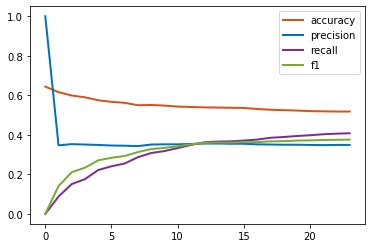

In [101]:
##### Call-out: assert accuracy #####
plot_scores(assert_labels[1:25], callout_assert)

In [103]:
print_labelset_scores(assert_labels[1:12], callout_assert)

acc:  0.541
precision:  0.354
recall:  0.349
f1:  0.352


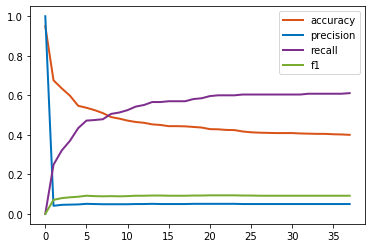

In [207]:
##### Call-out: commit accuracy #####
plot_scores(commit_labels, callout_commit)

In [205]:
commit_labels

['Agreement',
 'YesNoQuestion',
 'DeliberatePlan',
 'KnowledgeSharing',
 'ReportLocation',
 'Precedence',
 'MakeCommitment',
 'Instruction',
 'MoveTo',
 'Meeting',
 'Gratitude',
 'NeedPresence',
 'OnMyWay',
 'NeedAction',
 'LocationQuestion',
 'HelpRequest',
 'ContingentPlan',
 'AmTrapped',
 'MarkerBlock',
 'Disagreement',
 'Sight',
 'Search',
 'SOSMarker',
 'Question',
 'Block',
 'Save',
 'RoomClear',
 'RoleDeclare',
 'PlaceMarker',
 'Open',
 'MoveVictim',
 'MoveFrom',
 'MoveEntity',
 'HelpOffer',
 'HelpCommand',
 'Enter',
 'Damage',
 'ChangePriority']

In [115]:
print_labelset_scores(commit_labels[1:10], callout_commit)

acc:  0.657
precision:  0.052
recall:  0.343
f1:  0.09


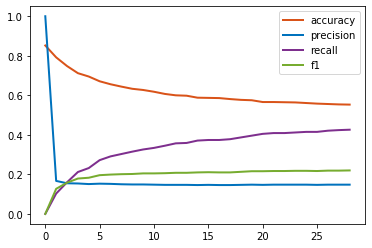

In [118]:
##### Call-out: action-directive accuracy #####
plot_scores(action_labels[1:30], callout_action)

In [119]:
print_labelset_scores(action_labels[1:20], callout_action)

acc:  0.575
precision:  0.148
recall:  0.396
f1:  0.216


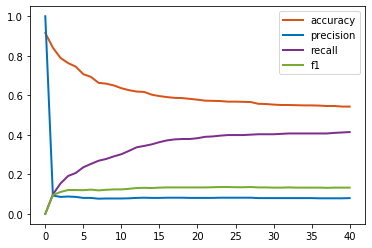

In [122]:
##### Call-out: info-request accuracy #####
plot_scores(info_labels[1:], callout_info)

In [123]:
print_labelset_scores(info_labels[1:10], callout_info)

acc:  0.65
precision:  0.078
recall:  0.291
f1:  0.124


In [ ]:
##### Call-out: whole labelset accuracy #####
callout_labels = find_label_freq(callout_df)
callout_labels = [i[1] for i in callout_labels]

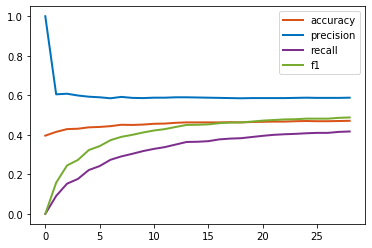

In [137]:
plot_scores(callout_labels[1:30], callout_df)

In [202]:
print_labelset_scores(callout_labels[1:30], callout_df)

acc:  0.472
precision:  0.588
recall:  0.419
f1:  0.489


In [141]:
##### Check-back: acknowledge #####
cb_acknowledge = find_label_freq(checkback_acknowledge)
cb_acknowledge = [i[1] for i in cb_acknowledge]

In [142]:
##### Check-back: accept #####
cb_accept = find_label_freq(checkback_accept)
cb_accept = [i[1] for i in cb_accept]

In [143]:
##### Check-back: follow-up-question #####
cb_question = find_label_freq(checkback_question)
cb_question = [i[1] for i in cb_question]

In [156]:
##### Check-back: info-provide #####
cb_info = find_label_freq(checkback_info)
cb_info = [i[1] for i in cb_info]

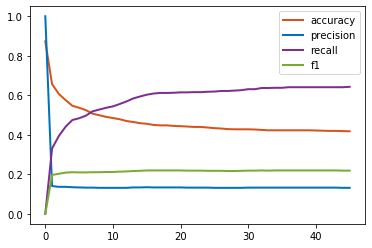

In [144]:
##### Check-back: acknowledge accuracy #####
plot_scores(cb_acknowledge, checkback_acknowledge)

In [149]:
print_labelset_scores(cb_acknowledge[:7], checkback_acknowledge)

acc:  0.507
precision:  0.133
recall:  0.519
f1:  0.211


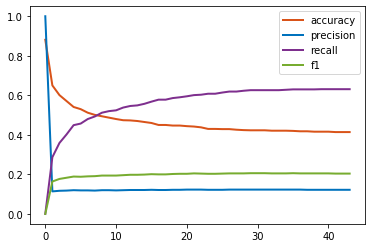

In [146]:
##### Check-back: accept accuracy #####
plot_scores(cb_accept, checkback_accept)

In [148]:
print_labelset_scores(cb_accept[:7], checkback_accept)

acc:  0.501
precision:  0.118
recall:  0.493
f1:  0.191


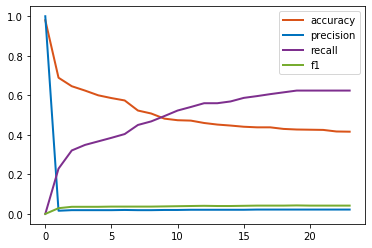

In [150]:
##### Check-back: follow-up-question accuracy #####
plot_scores(cb_question, checkback_question)

In [151]:
print_labelset_scores(cb_question[:8], checkback_question)

acc:  0.508
precision:  0.019
recall:  0.468
f1:  0.037


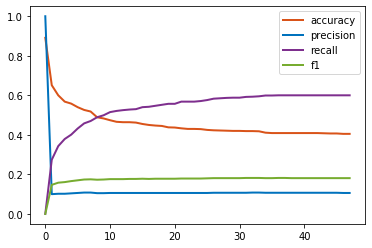

In [157]:
##### Check-back: info-provide accuracy #####
plot_scores(cb_info, checkback_info)

In [158]:
print_labelset_scores(cb_info[:7], checkback_info)

acc:  0.518
precision:  0.108
recall:  0.47
f1:  0.175


In [159]:
##### Check-back: whole labelset accuracy #####
checkback_labels = find_label_freq(checkback_df)
checkback_labels = [i[1] for i in checkback_labels]

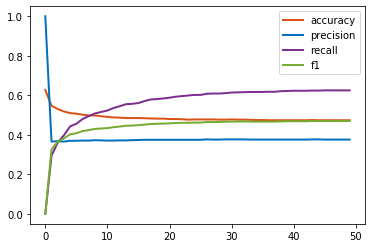

In [160]:
plot_scores(checkback_labels, checkback_df)

In [203]:
print_labelset_scores(checkback_labels[:7], checkback_df)

acc:  0.498
precision:  0.371
recall:  0.495
f1:  0.424


In [163]:
##### Closing-of-the-loop: acknowledge #####
cl_acknowledge = find_label_freq(closing_acknowledge)
cl_acknowledge = [i[1] for i in cl_acknowledge]

In [164]:
##### Closing-of-the-loop: accept #####
cl_accept = find_label_freq(closing_accept)
cl_accept = [i[1] for i in cl_accept]

In [165]:
##### Closing-of-the-loop: info-provide #####
cl_info = find_label_freq(closing_info)
cl_info = [i[1] for i in cl_info]

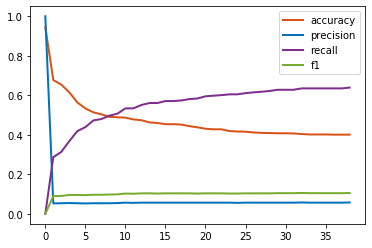

In [166]:
##### Closing-of-the-loop: acknowledge accuracy #####
plot_scores(cl_acknowledge, closing_acknowledge)

In [167]:
print_labelset_scores(cl_acknowledge[:6], closing_acknowledge)

acc:  0.514
precision:  0.054
recall:  0.473
f1:  0.097


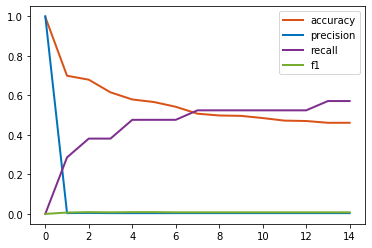

In [168]:
##### Closing-of-the-loop: accept accuracy #####
plot_scores(cl_accept, closing_accept)

In [170]:
print_labelset_scores(cl_accept[:7], closing_accept)

acc:  0.507
precision:  0.004
recall:  0.524
f1:  0.008


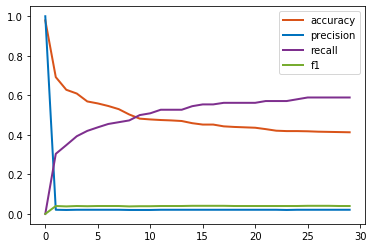

In [171]:
##### Closing-of-the-loop: info-provide accuracy #####
plot_scores(cl_info, closing_info)

In [172]:
print_labelset_scores(cl_info[:6], closing_info)

acc:  0.546
precision:  0.021
recall:  0.455
f1:  0.04


In [173]:
##### Closing-of-the-loop: whole labelset accuracy #####
closing_labels = find_label_freq(closing_df)
closing_labels = [i[1] for i in closing_labels]

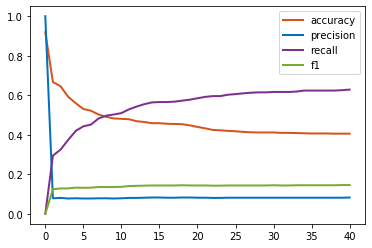

In [175]:
plot_scores(closing_labels, closing_df)

In [176]:
print_labelset_scores(closing_labels[:6], closing_df)

acc:  0.522
precision:  0.078
recall:  0.452
f1:  0.133


In [204]:
import json

callout_selection = callout_labels[1:30]
checkback_selection = checkback_labels[:7]
closing_selection = closing_labels[:6]

label_selection = {"callout_selection": callout_selection,
                   "checkback_selection": checkback_selection,
                   "closing_selection": closing_selection}
with open('label_selection.json', 'w') as file:
    json.dump(label_selection, file)